<h1>DONE BY: TAHA AHMED SIDDIQUI
48189111</h1>

### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>
(You can find the data relation diagram on iLearn - Portfolio Part 1 resources - Fig1)


 #### Q1. Remove missing data

Please remove the following records in the csv file:

 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [1]:
# your code and solutions
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# PortFolio done By: 
#     Taha Ahmed Siddiqui
#     48189111

In [3]:
ds="C:/Users/BEYOND/Downloads/The E-commerce Dataset.csv"
df=pd.read_csv(ds)

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       20000 non-null  int64  
 1   timestamp    20000 non-null  int64  
 2   review       20000 non-null  object 
 3   item         20000 non-null  object 
 4   rating       19983 non-null  float64
 5   helpfulness  19978 non-null  float64
 6   gender       19973 non-null  object 
 7   category     20000 non-null  object 
 8   item_id      20000 non-null  int64  
 9   item_price   20000 non-null  float64
 10  user_city    20000 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 1.7+ MB


userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64

In [5]:
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31


In [6]:
print("The length prior to the removal of missing data is: ",len(df))

The length prior to the removal of missing data is:  20000


In [7]:
# 1st Method
clean_df_occ=df.drop(df.index[(df['review']== 'none')])
print("The length after the removal of none data is: ", len(clean_df_occ))
clean_df=clean_df_occ.dropna()
print("The length after the removal of missing data is: ",len(clean_df))

The length after the removal of none data is:  19982
The length after the removal of missing data is:  19916


In [8]:
# 2nd Method
clean_df_occ =df
count=0
for index,row in df.iterrows():
    if row['review'] == 'none':
        clean_df_occ=clean_df_occ.drop([index])
        count+=1

print(count)
clean_df=clean_df_occ.dropna()
print("The length after the removal of none data is: ", len(clean_df_occ))
print("The length after the removal of missing data is: ",len(clean_df))

18
The length after the removal of none data is:  19982
The length after the removal of missing data is:  19916


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items


In [10]:
# your code and solutions
occ_array=df['review'].unique()
print('the number of unique review is: ',occ_array.size)

movie_array=df['item'].unique()
print('\nthe number of unique item is: ',movie_array.size)


genre_array=df['category'].unique()
print('\nthe number of unique category is: ',genre_array.size)


user_array=df['userId'].unique()
print('\nthe number of unique user is: ',user_array.size)



the number of unique review is:  19524

the number of unique item is:  89

the number of unique category is:  9

the number of unique user is:  8580


In [11]:
df['rating'].describe()

count    19983.000000
mean         3.701847
std          1.404619
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [35]:
# For Q2.3 (descriptive statistics of the number of items rated by different genders):
grouped_gender_df=df.groupby(['gender'])['item'].count().reset_index(name='count')
print("Descriptive Statistics for the Number of Items Rated by Different Genders:")
print(grouped_gender_df.describe())

Descriptive Statistics for the Number of Items Rated by Different Genders:
              count
count      2.000000
mean    9986.500000
std      236.880772
min     9819.000000
25%     9902.750000
50%     9986.500000
75%    10070.250000
max    10154.000000


In [36]:
# For Q2.4 (descriptive statistics of the number of ratings received by each item):
grouped_item_df=df.groupby(['item'])['rating'].count().reset_index(name='count')
print("Descriptive Statistics for the Number of Ratings Received by Each Item:")
print(grouped_item_df.describe())


Descriptive Statistics for the Number of Ratings Received by Each Item:
            count
count   89.000000
mean   224.528090
std    116.841393
min    140.000000
25%    162.000000
50%    187.000000
75%    245.000000
max    944.000000


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

<b>Summary:</b>

The boxplot provides a visual representation of the distribution of ratings for different categories.
The box represents the interquartile range (IQR) of the ratings within each category.
The line inside the box represents the median rating for each category.


 <b>Explanation:</b>

The boxplot allows you to compare the distribution of ratings across different categories, helping identify variations in user ratings and potential outliers within each category. Whereas, by rating all categories are top rated except books, games and media. 

Text(0, 0.5, 'Rating')

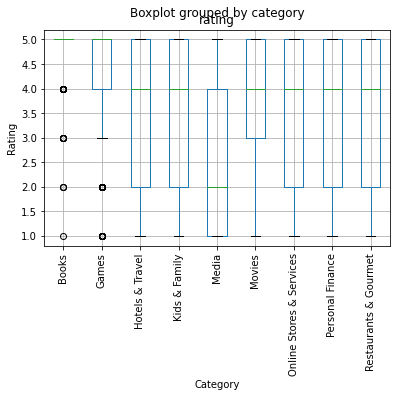

In [40]:
# category-rating correlation
clean_df.boxplot("rating",by="category")
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Rating")

<b>Explanation:</b>

The boxplot illustrates the distribution of ratings for different genders.
The box represents the interquartile range (IQR) of ratings within each gender category.
The line inside the box represents the median rating for each gender.


<b>Summary:</b>

The boxplot allows you to visually compare the distribution of ratings between different genders. 

Text(0, 0.5, 'Rating')

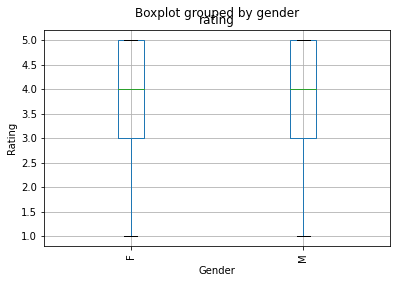

In [43]:
# gender_rating correlation
df.boxplot("rating",by="gender")
plt.xticks(rotation=90)
plt.xlabel("Gender")
plt.ylabel("Rating")

<b>Interpretation:</b>

The boxplot visualizes the distribution of ratings based on the 'helpfulness' category.
The box represents the interquartile range (IQR) of ratings within each 'helpfulness' category.
The line inside the box represents the median rating for each 'helpfulness' category.

<b>Summary:</b>

The boxplot allows you to compare the distribution of ratings across different 'helpfulness' categories. It provides insights into the central tendency, spread, and potential outliers in ratings for each category of 'helpfulness'.

Text(0, 0.5, 'Rating')

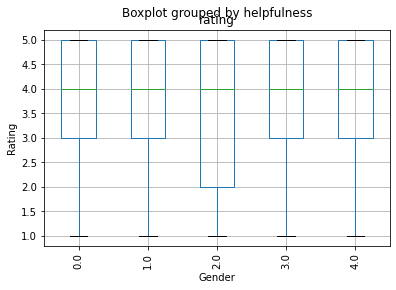

In [48]:
# helpfulness_rating correlation
clean_df.boxplot("rating",by="helpfulness")
plt.xticks(rotation=90)
plt.xlabel("Gender")
plt.ylabel("Rating")

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

1. reviews of which the helpfulness is no more than 2
2. users who rate less than 7 items
3. items that receives less than 11 ratings

Please remove the corresponding records in the csv file that involves outlier users, reviews and items. You need to follow the order of rules to perform data cleaning operations. After that, __print the length of the data__.

In [19]:
# your code and solutions
remove_outlier_df=clean_df.drop(clean_df.index[(clean_df['helpfulness'] <=2 )])
print("the length of the data after removing outlier helpfulness ",len(remove_outlier_df))

the length of the data after removing outlier helpfulness  13643


In [21]:
# your code and solutions
group_user_df=remove_outlier_df.groupby(['userId'])['rating'].count().reset_index(name= 'count')
print("the number of user after removing outlier helpfulness ",len(group_user_df))

the number of user after removing outlier helpfulness  6535


In [22]:
group_user_df.head()

,userId,count
0,0,3
1,1,1
2,2,2
3,3,2
4,4,7


In [25]:
# users who rate less than 7 items
userIds=group_user_df[group_user_df['count'] >=7 ]['userId'].tolist()
print(len(userIds))

267


In [26]:
remove_outlier_df=remove_outlier_df[remove_outlier_df['userId'].isin(userIds)]

In [27]:
print("the length of data is: ",len(remove_outlier_df))

the length of data is:  2741


In [28]:
group_item_df=remove_outlier_df.groupby(['item'])['rating'].count().reset_index(name= 'count')
group_item_df.head()

,item,count
0,AOL (America Online),93
1,All Advantage,72
2,Alta Vista (by 1stUp),10
3,Amazon.com,18
4,American Airlines,19


In [30]:
items=group_item_df[group_item_df['count'] >= 11]['item'].tolist()
print(len(items))

82


In [31]:
remove_outlier_df=remove_outlier_df[remove_outlier_df['item'].isin(items)]
len(remove_outlier_df)

2685

In [32]:
remove_outlier_df.to_csv('A combined dataset from ecommerce dataset_cleaned_data.csv',index=False)